### Workflow
* Credit Card Data
* Data Pre Processing
* Data Analysis
* Train Test Split
* Logistic Regression Model
* Evaluation


### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly imbalanced


0--> legit


1--> fraudalent

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measures of the data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


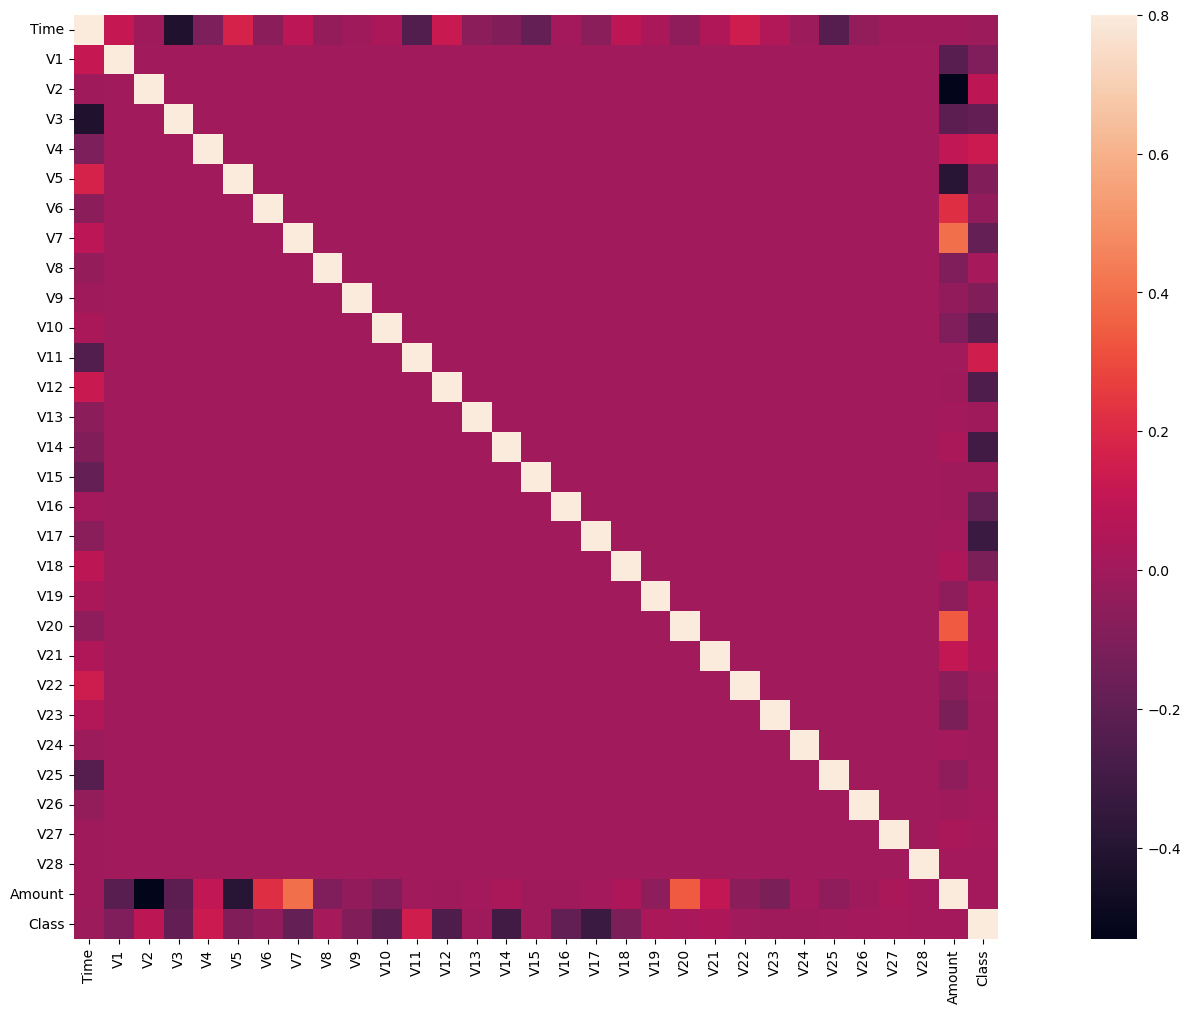

In [14]:
# Correlation matrix 
correlation_matrix = credit_card_data.corr() 
fig = plt.figure(figsize = (24, 12)) 
sns.heatmap(correlation_matrix, vmax = .8, square = True) 
plt.show() 

vmax parameter sets the maximum value for the color scale in the heatmap. In this case, it's set to .8, meaning that the maximum value in the correlation matrix will be represented by the color scale's maximum value, which is .8 in this case. Any correlation value higher than .8 will be shown with the same color as .8

##### Under-Sampling

##### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

##### Number of Fraudulent Transactions --> 492



In [15]:
legit_sample = legit.sample(n=492)

##### Concatenating two DataFrames

In [16]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189036,128239.0,-0.454727,0.339982,1.412311,2.965942,1.286245,0.453643,-0.216817,0.332134,-0.942894,...,0.394985,0.997277,0.114785,0.596528,-0.692356,-0.068391,0.126100,0.144113,7.35,0
215435,140069.0,2.043027,-0.149873,-1.189200,0.230529,0.017548,-0.720623,0.033504,-0.133446,0.393873,...,-0.265904,-0.693749,0.296112,-0.352310,-0.305665,0.200371,-0.078705,-0.074773,0.99,0
239004,149915.0,1.818747,-0.522036,-1.086556,0.341741,-0.308931,-0.928119,0.225196,-0.330801,0.946354,...,-0.082482,-0.177473,0.113712,0.031173,-0.090826,-0.100445,-0.036491,-0.035082,116.24,0
267189,162661.0,-1.453137,2.231048,1.100027,3.893422,1.041134,3.423460,-0.561025,-0.343066,-2.520322,...,1.675679,0.132552,-0.012674,-1.770793,0.146459,0.637455,0.357344,0.069186,18.96,0
58966,48626.0,-0.761171,0.796878,1.639617,-1.545676,0.103018,-0.570948,0.659682,-0.066478,0.144422,...,-0.139785,-0.162619,-0.157056,0.023280,-0.318950,0.699457,0.194778,-0.001010,0.69,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97776.947154,0.103636,0.012022,0.020645,-0.000389,0.029314,-0.022121,0.030608,-0.031659,-0.027956,...,0.007895,0.087906,-0.018208,0.015163,-0.028957,-0.015720,0.019455,-0.003329,0.002306,85.831057
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into Features & Targets

In [21]:
X = new_dataset.drop(columns= "Class", axis = 1)
Y = new_dataset['Class']

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
189036,128239.0,-0.454727,0.339982,1.412311,2.965942,1.286245,0.453643,-0.216817,0.332134,-0.942894,...,-0.003742,0.394985,0.997277,0.114785,0.596528,-0.692356,-0.068391,0.126100,0.144113,7.35
215435,140069.0,2.043027,-0.149873,-1.189200,0.230529,0.017548,-0.720623,0.033504,-0.133446,0.393873,...,-0.242707,-0.265904,-0.693749,0.296112,-0.352310,-0.305665,0.200371,-0.078705,-0.074773,0.99
239004,149915.0,1.818747,-0.522036,-1.086556,0.341741,-0.308931,-0.928119,0.225196,-0.330801,0.946354,...,0.032733,-0.082482,-0.177473,0.113712,0.031173,-0.090826,-0.100445,-0.036491,-0.035082,116.24
267189,162661.0,-1.453137,2.231048,1.100027,3.893422,1.041134,3.423460,-0.561025,-0.343066,-2.520322,...,-0.159048,1.675679,0.132552,-0.012674,-1.770793,0.146459,0.637455,0.357344,0.069186,18.96
58966,48626.0,-0.761171,0.796878,1.639617,-1.545676,0.103018,-0.570948,0.659682,-0.066478,0.144422,...,0.222796,-0.139785,-0.162619,-0.157056,0.023280,-0.318950,0.699457,0.194778,-0.001010,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
Y

189036    0
215435    0
239004    0
267189    0
58966     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

##### Split the data into Training data & Testing Data

In [24]:
                                                                        #evenly distributed two classes in Xtrain and Xtest
                   
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

stratify parameter is used in the train_test_split function call. This parameter is used to ensure that the distribution of target classes in the dataset is preserved in the train and test datasets.

When stratify=Y is specified, it means that the data will be split in a way that maintains the proportion of the target classes in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, where one class may dominate the data. By using stratify, you ensure that both the training and testing sets have representative samples from each class, which can lead to better model performance and evaluation.

In summary, using stratify=Y helps in maintaining the balance of classes between the training and testing datasets, which is crucial for building and evaluating machine learning models, especially when dealing with classification tasks.








In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model Training

##### Logistic Regression

In [26]:
model = LogisticRegression()

In [27]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

##### Accuracy Score

In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Initializing and training the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Calculating various performance metrics
acc = accuracy_score(Y_test, Y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(Y_test, Y_pred)
print("The precision is {}".format(prec))

rec = recall_score(Y_test, Y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(Y_test, Y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Y_test, Y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))
# https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7 
#to read more about MCC

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


The accuracy is 0.9390862944162437
The precision is 0.9777777777777777
The recall is 0.8979591836734694
The F1-Score is 0.9361702127659575
The Matthews correlation coefficient is 0.8810323881469696
Confusion Matrix:
[[97  2]
 [10 88]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


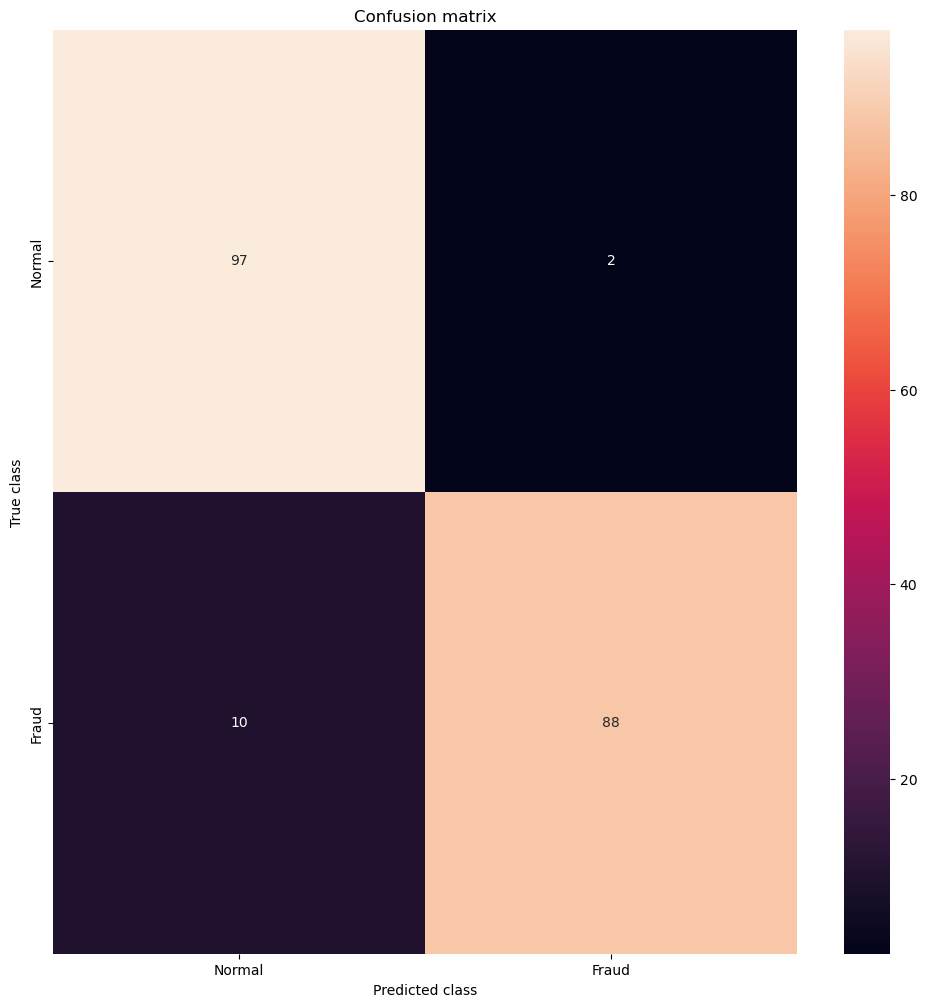

In [33]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

# Automating the Machine Learning Pipeline for Credit card fraud detection

In [34]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install --user pycaret

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd

In [37]:
path ="creditcard.csv"
data = pd.read_csv(path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
#checking for imbalance
len(data[data['Class']== 0])

284315

In [39]:
len(data[data['Class']== 1]) 

492

In [ ]:
#data is highly imbalanced accuracy score might not be a good performance metric.

##### Setting up the pycaret classification

In [43]:
# Importing module and initializing setup 
from pycaret.classification import * 
clf1 = setup(data = data, target = 'Class') 

,Description,Value
0,Session id,6527
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [44]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9522,0.8078,0.9575,0.8743,0.8741,0.8783,49.9060
et,Extra Trees Classifier,0.9996,0.9549,0.8137,0.9605,0.8794,0.8792,0.8831,6.7340
xgboost,Extreme Gradient Boosting,0.9996,0.9794,0.8195,0.9509,0.8792,0.8790,0.8820,1.5830
lda,Linear Discriminant Analysis,0.9994,0.9082,0.7613,0.8602,0.8056,0.8053,0.8079,1.4410
lr,Logistic Regression,0.9992,0.9708,0.6397,0.8661,0.7340,0.7336,0.7430,8.7570
dt,Decision Tree Classifier,0.9992,0.8907,0.7818,0.7715,0.7758,0.7754,0.7758,5.2360
ada,Ada Boost Classifier,0.9992,0.9773,0.7124,0.8160,0.7562,0.7558,0.7598,20.0820
gbc,Gradient Boosting Classifier,0.9991,0.7445,0.5915,0.8526,0.6709,0.6705,0.6903,104.9330
ridge,Ridge Classifier,0.9989,0.0000,0.4366,0.8474,0.5717,0.5712,0.6050,0.1610
knn,K Neighbors Classifier,0.9984,0.6209,0.0584,0.8250,0.1071,0.1069,0.2103,16.3270


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6527, verbose=0,
                       warm_start=False)

##### Creating the best model

In [45]:
RF = create_model('rf') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9556,0.8286,0.9667,0.8923,0.8921,0.8948
1,0.9996,0.9852,0.8857,0.9118,0.8986,0.8984,0.8985
2,0.9995,0.9560,0.7429,0.9630,0.8387,0.8385,0.8456
3,0.9997,0.9561,0.8857,0.9688,0.9254,0.9252,0.9262
4,0.9996,0.9847,0.7941,0.9643,0.8710,0.8708,0.8749
5,0.9997,0.9698,0.8529,1.0000,0.9206,0.9205,0.9234
6,0.9997,0.9249,0.8235,1.0000,0.9032,0.9031,0.9073
7,0.9993,0.9098,0.6471,0.9565,0.7719,0.7716,0.7864
8,0.9994,0.9249,0.7941,0.8438,0.8182,0.8179,0.8183


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6527, verbose=0,
                       warm_start=False)

##### Hyperparameter Tuning

In [48]:
model = tune_model(RF)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:18:14
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits



KeyboardInterrupt



##### Saving the model

In [ ]:
save_model(RF, 'RF_saved') 

##### Loading the model

In [ ]:
RF_saved = load_model('RF_saved')

In [ ]:
new_data = pd.read_csv("creditcard_2023.csv")

In [ ]:
# from pycaret.classification import load_model

# Load the saved model
#RF_saved = load_model('RF_saved')


# predictions = predict_model(RF_saved, data=new_data)

In [ ]:
# predictions

##### Finalizing the Model

In [ ]:
#A step just before deployment when you merge the train
#and the validation data and train model on all the data available to you.


In [ ]:
final_RF = finalize_model(rf) 